## Flux Scanning based on Enforced Objective Flux

In [ ]:
# ignore in jupyter classroom
from google.colab import drive
# This will prompt for authorization.

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np

In [ ]:
from cobra.io import read_sbml_model

# path for google drive
auto = read_sbml_model('/content/drive/MyDrive/iCre1355_auto.xml')

In [2]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from cobra import Reaction, Metabolite
from cameo.strain_design.heuristic.evolutionary_based import OptGene
from cameo.strain_design.deterministic.linear_programming import OptKnock

In [137]:
fseof = FSEOF(auto)
result = fseof.run(target=auto.reactions.EX_h2_e)
df= result.data_frame

In [138]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)

# removing genes from dataframe 
removed_zero = (df != 0.000000).all(axis=1)
df = df.loc[removed_zero]

Following graph depicts fluxes from reaction, which either increase or decrease during hydrogen production. Thus they are a potential target for gene overexpression or knockout.

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

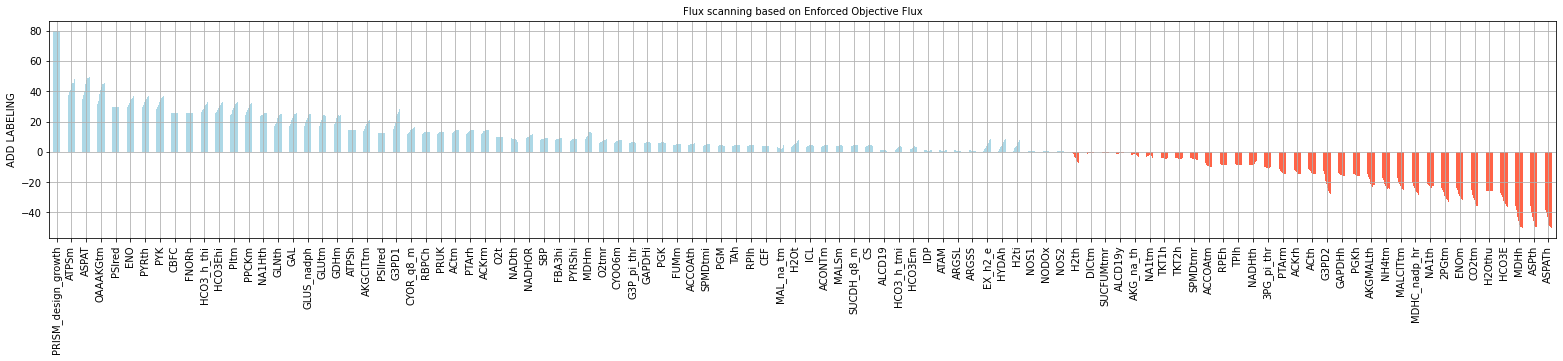

In [139]:
#@title Flux scanning based on Enforced Objective Flux
# color bars according to value
def bar_color(df,color1,color2):
    return np.where(df.values>0,color1,color2).T

fig = df.plot(legend=None, kind='bar', color=bar_color(df,'lightblue','tomato'),figsize=(27, 4), grid =True);
fig.set_ylabel('ADD LABELING')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=10)

In [108]:
df.head()

,1,2,3,4,5,6,7,8,9,10
PRISM_design_growth,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
ATPSm,43.921949,44.828253,45.734557,46.640861,47.429707,48.323444,48.808004,47.513488,46.218973,45.785068
PYK,30.889268,31.985254,33.081240,34.177226,35.022715,36.089053,36.630803,35.715477,34.800151,34.175465
ENO,30.889268,31.985254,33.081240,34.177226,35.028102,36.089053,36.630803,35.715477,34.800151,34.175465
PYRth,30.874476,31.973098,33.071720,34.170343,35.018455,36.097804,36.712693,36.170878,35.795711,36.121490


"Nevertheless, some algorithms such as FSEOF are
not based on the coupling of product formation and cell
growth [35], so FSEOF is still useful for the purpose of predicting targets for strain improvement. FSEOF identifies
a list of reactions which show increased fluxes as the flux
through product formation is gradually increased. " (Kim et al., 2014) DOI 10.1002/biot.201300539

In [129]:
# calculating the relative change of fluxes 
df['rel_change'] = (df[10]-df[1])/df[10] +1

In [130]:
# identifying reactions where the flux increases more than 90%
target_reactions_df = df[df['rel_change'] > 1.9]

Of course also reaction with an change in flux lower than 90% can be used. 

## Following reactions show an increase or decrease of more than 90% when increasing the flux through hydrogen formation.



The genes of these reactions could be used for overaxpression or a gene knock out, however we have to assure that these modifications wont have an effect on cell viability.

In [135]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,rel_change
H2ti,0.837055,1.674110,2.511165,3.348220,4.185275,5.022330,5.859386,6.696441,7.533496,8.370551,1.900000
HYDAh,0.829659,1.668032,2.506405,3.344779,4.150818,5.022330,5.859386,6.696441,7.533496,8.370551,1.900884
NOS1,0.044378,0.036469,0.028560,0.020651,0.010086,0.028398,0.108551,0.387569,0.666587,0.568371,1.921921
ARGSL,0.044378,0.036469,0.028560,0.020651,0.010086,0.028398,0.108551,0.387569,0.666587,0.568371,1.921921
ARGSS,0.044378,0.036469,0.028560,0.020651,0.010086,0.028398,0.108551,0.387569,0.666587,0.568371,1.921921
G3PD1,0.029585,0.024313,0.019040,0.013767,0.005826,0.545461,1.237224,1.524353,1.811483,2.013754,1.985309
NOS2,0.022189,0.018234,0.014280,0.010325,0.005043,0.014199,0.054275,0.193784,0.333294,0.284185,1.921921
NODOx,0.022189,0.018234,0.014280,0.010325,0.005043,0.014199,0.054275,0.193784,0.333294,0.284185,1.921921
GLYS,0.014793,0.012156,0.009520,0.006884,0.001566,0.005448,0.027138,0.096892,0.166647,0.184075,1.919636
GLYNA1tm,-0.029585,-0.024313,-0.019040,-0.013767,-0.005826,-0.010897,-0.054275,-0.193784,-0.333294,-0.300332,1.901492


In [133]:
df = target_reactions_df.drop(labels='rel_change', axis=1)

Text(0.5, 1.0, 'Reaction with a change in Flux 40%')

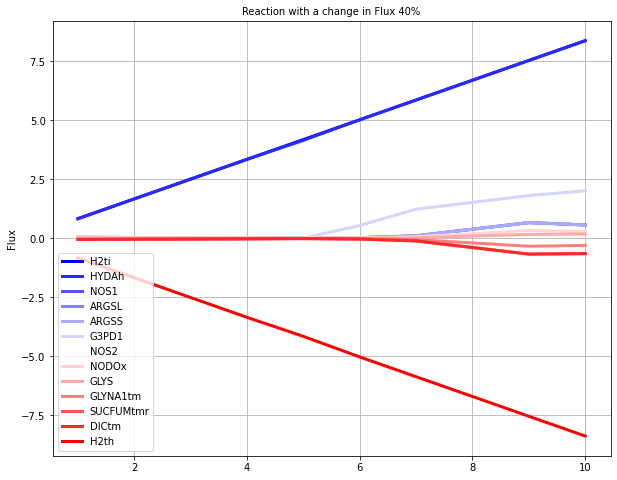

In [134]:
fig = df.T.plot(cmap="bwr",figsize=(10, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reaction with a change in Flux 90%', size=10)

**Increase**:

- H2ti: Hydrogen Transport
- HYDAh: FeFe-Hydrogenase, chloroplast
- NOS1: L-Arginine,NADPH:oxygen oxidoreductase (N-(omega)-hydroxyarginine-forming)
- ARGSL: argininosuccinate lyase
- ARGSS: argininosuccinate synthase
- G3PD1: glycerol-3-phosphate dehydrogenase (NAD)
- NOS2: N-(omega)-Hydroxyarginine,NADPH:oxygen oxidoreductase (nitric-oxide-forming)
- NODOx: nitric oxide, NADH2:oxygen oxidoreductase
- GLYS: glycine synthase


**Decrease**:
- GLYNA1tm: Neutral amino acid transporter (gly), mitochondrial
- SUCFUMtmr: Succinate/fumarate antiporter, mitochondrial
- DICtm:dicarboxylate transport, mitochondrial
- H2th: hydrogen transport, chloroplast